<a href="https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day2/exercises/2_5_overfiting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

## Googleドライブのマウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## sys.pathの設定

以下では，Googleドライブのマイドライブ直下にDNN_codeフォルダを置くことを仮定しています．必要に応じて，パスを変更してください．

In [2]:
import sys
sys.path.append('/content/drive/My Drive/rabbit_challenge/DNN_code_colab_ver200425')
sys.path.append('/content/drive/My Drive/rabbit_challenge/DNN_code_colab_ver200425/lesson_2')

# overfiting

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.19
                : 10. 正答率(テスト) = 0.1545
Generation: 20. 正答率(トレーニング) = 0.26
                : 20. 正答率(テスト) = 0.2186
Generation: 30. 正答率(トレーニング) = 0.34
                : 30. 正答率(テスト) = 0.2734
Generation: 40. 正答率(トレーニング) = 0.41
                : 40. 正答率(テスト) = 0.312
Generation: 50. 正答率(トレーニング) = 0.44333333333333336
                : 50. 正答率(テスト) = 0.3407
Generation: 60. 正答率(トレーニング) = 0.4866666666666667
                : 60. 正答率(テスト) = 0.3589
Generation: 70. 正答率(トレーニング) = 0.55
                : 70. 正答率(テスト) = 0.4064
Generation: 80. 正答率(トレーニング) = 0.6533333333333333
                : 80. 正答率(テスト) = 0.4767
Generation: 90. 正答率(トレーニング) = 0.7233333333333334
                : 90. 正答率(テスト) = 0.526
Generation: 100. 正答率(トレーニング) = 0.78
                : 100. 正答率(テスト) = 0.5852
Generation: 110. 正答率(トレーニング) = 0.8133333333333334
                : 110. 正答率(テスト) = 0.607
Generation: 120. 正答率(トレーニング) = 0.8633333333333333
                : 120. 正答率(テスト) = 0.6351
Ge

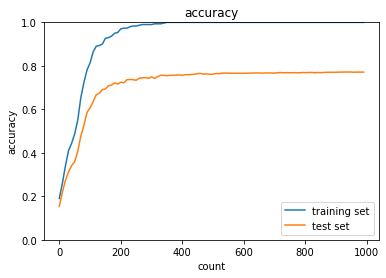

In [3]:
import numpy as np
from collections import OrderedDict
from common import layers
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet
from common import optimizer


(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = optimizer.SGD(learning_rate=0.01)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## weight decay
### L2

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.16666666666666666
                : 10. 正答率(テスト) = 0.1529
Generation: 20. 正答率(トレーニング) = 0.23333333333333334
                : 20. 正答率(テスト) = 0.2033
Generation: 30. 正答率(トレーニング) = 0.29333333333333333
                : 30. 正答率(テスト) = 0.2434
Generation: 40. 正答率(トレーニング) = 0.34
                : 40. 正答率(テスト) = 0.2757
Generation: 50. 正答率(トレーニング) = 0.4
                : 50. 正答率(テスト) = 0.3061
Generation: 60. 正答率(トレーニング) = 0.44666666666666666
                : 60. 正答率(テスト) = 0.3386
Generation: 70. 正答率(トレーニング) = 0.51
                : 70. 正答率(テスト) = 0.3604
Generation: 80. 正答率(トレーニング) = 0.54
                : 80. 正答率(テスト) = 0.3883
Generation: 90. 正答率(トレーニング) = 0.57
                : 90. 正答率(テスト) = 0.412
Generation: 100. 正答率(トレーニング) = 0.6033333333333334
                : 100. 正答率(テスト) = 0.4299
Generation: 110. 正答率(トレーニング) = 0.6466666666666666
                : 110. 正答率(テスト) = 0.4636
Generation: 120. 正答率(トレーニング) = 0.66
                : 120. 正答率(テスト) = 0.492

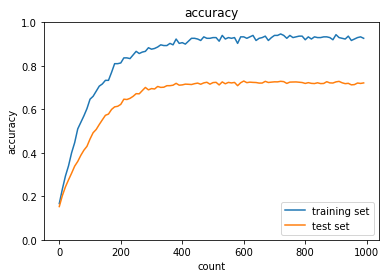

In [4]:
from common import optimizer

(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.5733333333333334
                : 10. 正答率(テスト) = 0.3923
Generation: 20. 正答率(トレーニング) = 0.5866666666666667
                : 20. 正答率(テスト) = 0.4861
Generation: 30. 正答率(トレーニング) = 0.5666666666666667
                : 30. 正答率(テスト) = 0.5032
Generation: 40. 正答率(トレーニング) = 0.7366666666666667
                : 40. 正答率(テスト) = 0.5751
Generation: 50. 正答率(トレーニング) = 0.9166666666666666
                : 50. 正答率(テスト) = 0.7259
Generation: 60. 正答率(トレーニング) = 0.92
                : 60. 正答率(テスト) = 0.7309
Generation: 70. 正答率(トレーニング) = 0.8233333333333334
                : 70. 正答率(テスト) = 0.6893
Generation: 80. 正答率(トレーニング) = 0.6733333333333333
                : 80. 正答率(テスト) = 0.551
Generation: 90. 正答率(トレーニング) = 0.95
                : 90. 正答率(テスト) = 0.7349
Generation: 100. 正答率(トレーニング) = 0.7933333333333333
                : 100. 正答率(テスト) = 0.6256
Generation: 110. 正答率(トレーニング) = 0.7833333333333333
                : 110. 正答率(テスト) = 0.6402
Generation: 120. 正答率(トレーニング) = 0.933

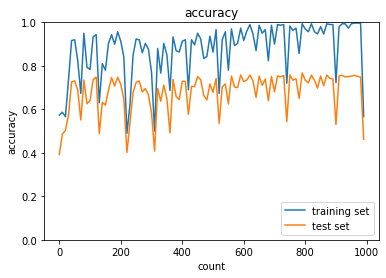

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------
## [try] weigth_decay_lambdaの値を変更して正則化の強さを確認しよう
----------------------------------------------------------------------------------------------------------------------------------------

L1 + weigth_decay_lambda=1(学習率が変わらない、)


データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.11333333333333333
                : 10. 正答率(テスト) = 0.1007
Generation: 20. 正答率(トレーニング) = 0.10333333333333333
                : 20. 正答率(テスト) = 0.1009
Generation: 30. 正答率(トレーニング) = 0.10333333333333333
                : 30. 正答率(テスト) = 0.1009
Generation: 40. 正答率(トレーニング) = 0.11333333333333333
                : 40. 正答率(テスト) = 0.101
Generation: 50. 正答率(トレーニング) = 0.11333333333333333
                : 50. 正答率(テスト) = 0.101
Generation: 60. 正答率(トレーニング) = 0.11333333333333333
                : 60. 正答率(テスト) = 0.098
Generation: 70. 正答率(トレーニング) = 0.11333333333333333
                : 70. 正答率(テスト) = 0.101
Generation: 80. 正答率(トレーニング) = 0.11333333333333333
                : 80. 正答率(テスト) = 0.101
Generation: 90. 正答率(トレーニング) = 0.11333333333333333
                : 90. 正答率(テスト) = 0.101
Generation: 100. 正答率(トレーニング) = 0.11333333333333333
                : 100. 正答率(テスト) = 0.101
Generation: 110. 正答率(トレーニング) = 0.11333333333333333
                : 110. 正答率(テスト) = 0.101
Gene

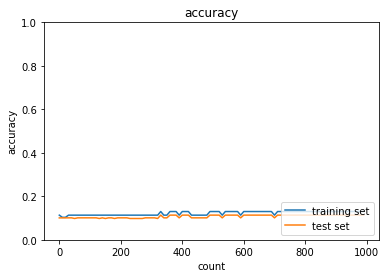

In [6]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

L1 + weigth_decay_lambda=float_min(過学習の抑制ができない)

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.56
                : 10. 正答率(テスト) = 0.4327
Generation: 20. 正答率(トレーニング) = 0.5033333333333333
                : 20. 正答率(テスト) = 0.437
Generation: 30. 正答率(トレーニング) = 0.6333333333333333
                : 30. 正答率(テスト) = 0.5114
Generation: 40. 正答率(トレーニング) = 0.57
                : 40. 正答率(テスト) = 0.4256
Generation: 50. 正答率(トレーニング) = 0.9633333333333334
                : 50. 正答率(テスト) = 0.7428
Generation: 60. 正答率(トレーニング) = 0.9933333333333333
                : 60. 正答率(テスト) = 0.7678
Generation: 70. 正答率(トレーニング) = 0.9966666666666667
                : 70. 正答率(テスト) = 0.7822
Generation: 80. 正答率(トレーニング) = 1.0
                : 80. 正答率(テスト) = 0.7859
Generation: 90. 正答率(トレーニング) = 1.0
                : 90. 正答率(テスト) = 0.7897
Generation: 100. 正答率(トレーニング) = 1.0
                : 100. 正答率(テスト) = 0.7916
Generation: 110. 正答率(トレーニング) = 1.0
                : 110. 正答率(テスト) = 0.7898
Generation: 120. 正答率(トレーニング) = 1.0
                : 120. 正答率(テスト) = 0.7911
Generation: 130. 正答率

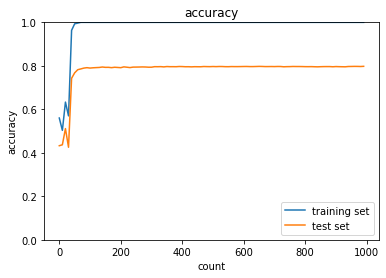

In [7]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = sys.float_info.min
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [8]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.21
                : 10. 正答率(テスト) = 0.1463
Generation: 20. 正答率(トレーニング) = 0.2733333333333333
                : 20. 正答率(テスト) = 0.1777
Generation: 30. 正答率(トレーニング) = 0.27
                : 30. 正答率(テスト) = 0.1815
Generation: 40. 正答率(トレーニング) = 0.28
                : 40. 正答率(テスト) = 0.1927
Generation: 50. 正答率(トレーニング) = 0.2833333333333333
                : 50. 正答率(テスト) = 0.1949
Generation: 60. 正答率(トレーニング) = 0.28
                : 60. 正答率(テスト) = 0.2034
Generation: 70. 正答率(トレーニング) = 0.29
                : 70. 正答率(テスト) = 0.2145
Generation: 80. 正答率(トレーニング) = 0.29
                : 80. 正答率(テスト) = 0.2261
Generation: 90. 正答率(トレーニング) = 0.2966666666666667
                : 90. 正答率(テスト) = 0.225
Generation: 100. 正答率(トレーニング) = 0.32666666666666666
                : 100. 正答率(テスト) = 0.2401
Generation: 110. 正答率(トレーニング) = 0.3433333333333333
                : 110. 正答率(テスト) = 0.2532
Generation: 120. 正答率(トレーニング) = 0.35
                : 120. 正答率(テスト) = 0.2614
Generation: 13

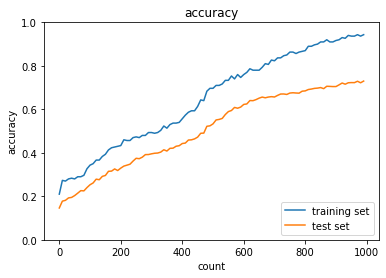

In [9]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
## [try] dropout_ratioの値を変更してみよう

dropout_ratio=0.3(0.15*2) \
ノードを削除すぎて学習ができていない。

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09333333333333334
                : 10. 正答率(テスト) = 0.0916
Generation: 20. 正答率(トレーニング) = 0.07333333333333333
                : 20. 正答率(テスト) = 0.096
Generation: 30. 正答率(トレーニング) = 0.06666666666666667
                : 30. 正答率(テスト) = 0.0962
Generation: 40. 正答率(トレーニング) = 0.07333333333333333
                : 40. 正答率(テスト) = 0.0976
Generation: 50. 正答率(トレーニング) = 0.07
                : 50. 正答率(テスト) = 0.0971
Generation: 60. 正答率(トレーニング) = 0.07666666666666666
                : 60. 正答率(テスト) = 0.102
Generation: 70. 正答率(トレーニング) = 0.09666666666666666
                : 70. 正答率(テスト) = 0.1055
Generation: 80. 正答率(トレーニング) = 0.12666666666666668
                : 80. 正答率(テスト) = 0.1153
Generation: 90. 正答率(トレーニング) = 0.12
                : 90. 正答率(テスト) = 0.1279
Generation: 100. 正答率(トレーニング) = 0.14
                : 100. 正答率(テスト) = 0.1442
Generation: 110. 正答率(トレーニング) = 0.15666666666666668
                : 110. 正答率(テスト) = 0.1571
Generation: 120. 正答率(トレーニング) = 0.18
       

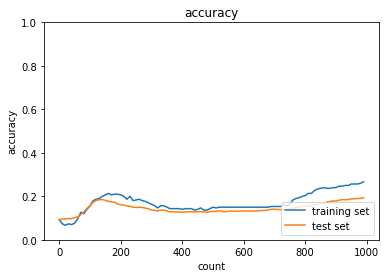

In [13]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.3
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

dropout_ratio = 0.000075 \
ノードを落とさなすぎて過学習を起こした(L1と組み合わせればこのあたりの比率でも補える。)

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.18666666666666668
                : 10. 正答率(テスト) = 0.1303
Generation: 20. 正答率(トレーニング) = 0.2833333333333333
                : 20. 正答率(テスト) = 0.2109
Generation: 30. 正答率(トレーニング) = 0.4266666666666667
                : 30. 正答率(テスト) = 0.2969
Generation: 40. 正答率(トレーニング) = 0.5066666666666667
                : 40. 正答率(テスト) = 0.3506
Generation: 50. 正答率(トレーニング) = 0.57
                : 50. 正答率(テスト) = 0.391
Generation: 60. 正答率(トレーニング) = 0.6133333333333333
                : 60. 正答率(テスト) = 0.4356
Generation: 70. 正答率(トレーニング) = 0.6566666666666666
                : 70. 正答率(テスト) = 0.4711
Generation: 80. 正答率(トレーニング) = 0.7
                : 80. 正答率(テスト) = 0.5097
Generation: 90. 正答率(トレーニング) = 0.7533333333333333
                : 90. 正答率(テスト) = 0.5573
Generation: 100. 正答率(トレーニング) = 0.8
                : 100. 正答率(テスト) = 0.5869
Generation: 110. 正答率(トレーニング) = 0.82
                : 110. 正答率(テスト) = 0.609
Generation: 120. 正答率(トレーニング) = 0.8466666666666667
                

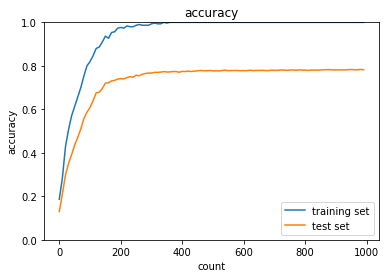

In [24]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.000075
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## [try] optimizerとdropout_ratioの値を変更してみよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12333333333333334
                : 10. 正答率(テスト) = 0.1152
Generation: 20. 正答率(トレーニング) = 0.13
                : 20. 正答率(テスト) = 0.1136
Generation: 30. 正答率(トレーニング) = 0.13333333333333333
                : 30. 正答率(テスト) = 0.1178
Generation: 40. 正答率(トレーニング) = 0.13
                : 40. 正答率(テスト) = 0.1146
Generation: 50. 正答率(トレーニング) = 0.13
                : 50. 正答率(テスト) = 0.1135
Generation: 60. 正答率(トレーニング) = 0.13
                : 60. 正答率(テスト) = 0.1135
Generation: 70. 正答率(トレーニング) = 0.13
                : 70. 正答率(テスト) = 0.1135
Generation: 80. 正答率(トレーニング) = 0.13
                : 80. 正答率(テスト) = 0.1135
Generation: 90. 正答率(トレーニング) = 0.13
                : 90. 正答率(テスト) = 0.1135
Generation: 100. 正答率(トレーニング) = 0.13
                : 100. 正答率(テスト) = 0.1135
Generation: 110. 正答率(トレーニング) = 0.13
                : 110. 正答率(テスト) = 0.1135
Generation: 120. 正答率(トレーニング) = 0.13
                : 120. 正答率(テスト) = 0.1135
Generation: 130. 正答率(トレーニング) = 0.13
                : 

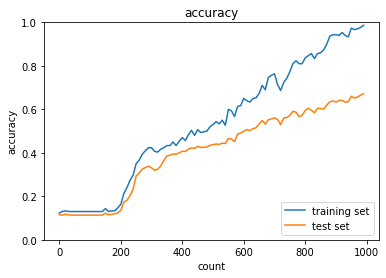

In [38]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.35
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
#optimizer = optimizer.SGD(learning_rate=0.01)
optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
#optimizer = optimizer.AdaGrad(learning_rate=0.01)
#optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout + L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.13
                : 10. 正答率(テスト) = 0.1097
Generation: 20. 正答率(トレーニング) = 0.14666666666666667
                : 20. 正答率(テスト) = 0.1235
Generation: 30. 正答率(トレーニング) = 0.17
                : 30. 正答率(テスト) = 0.1439
Generation: 40. 正答率(トレーニング) = 0.18333333333333332
                : 40. 正答率(テスト) = 0.1609
Generation: 50. 正答率(トレーニング) = 0.21
                : 50. 正答率(テスト) = 0.1774
Generation: 60. 正答率(トレーニング) = 0.24
                : 60. 正答率(テスト) = 0.1933
Generation: 70. 正答率(トレーニング) = 0.27666666666666667
                : 70. 正答率(テスト) = 0.2111
Generation: 80. 正答率(トレーニング) = 0.2966666666666667
                : 80. 正答率(テスト) = 0.2183
Generation: 90. 正答率(トレーニング) = 0.2966666666666667
                : 90. 正答率(テスト) = 0.2294
Generation: 100. 正答率(トレーニング) = 0.35
                : 100. 正答率(テスト) = 0.2494
Generation: 110. 正答率(トレーニング) = 0.38666666666666666
                : 110. 正答率(テスト) = 0.2765
Generation: 120. 正答率(トレーニング) = 0.4033333333333333
                : 120. 

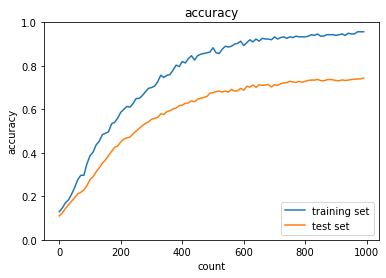

In [10]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.08
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        use_dropout = use_dropout, dropout_ratio = dropout_ratio)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []
hidden_layer_num = network.hidden_layer_num

plot_interval=10

# 正則化強度設定 ======================================
weight_decay_lambda=0.004
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()